# Multiple Features

- Multiple variables $x_1, x_2, x_3, x_4...$
    - for example: size, length, weight, height, etc.

## Notations

$n$ = number of features

$i$ = index of the training data in the training set

$x^{(i)}$= input (features) of $i^{th}$ training example

$x^{(i)}_j$= value of feature $j$ in $i^{th}$ training example

## Multivariate Linear Regression

$h_\theta(x) = \theta_0 + \theta_1x+\theta_2x_2+\theta_3x_3+\theta_4x_4+...$

for convenience of notation $x_0 = 1$

$x = \begin{bmatrix}
x_0\\ 
x_1\\ 
x_2\\ 
x_3\\ 
...\\
x_n
\end{bmatrix}$

$\theta = \begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\theta_2\\ 
\theta_3\\ 
...\\
\theta_n
\end{bmatrix}$

$h_\theta(x) = \theta_0x_0 + \theta_1x+\theta_2x_2+\theta_3x_3+\theta_4x_4+...$

$=\theta^Tx$

$\theta$ Transpose time x = hypothesis

$\theta^T = \begin{bmatrix}
\theta_0& 
\theta_1& 
\theta_2& 
\theta_3&
...&
\theta_n
\end{bmatrix}$

$x = \begin{bmatrix}
x_0\\ 
x_1\\ 
x_2\\ 
x_3\\ 
...\\
x_n
\end{bmatrix}$

### Gradient Descent

Parameters: $\theta_0, \theta_1,....,\theta_n$ is denoted as just $\theta$

$J(\theta_0, \theta_1, ...,\theta_n)$  is denoted as just $J(\theta)$

**Cost Function**

$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

Repeat {

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$

}

Algorithm (n ≥ 1):

Repeat {

$\theta_j := \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$

}

The end $x^{(i)}_j$ term is the power rule from the partial derivative when the cost function's partial derivative taken in respect to $\theta_j$

$\frac{\partial}{\partial\theta_j}h_\theta(x) = \theta_0x_0 + \theta_1x+\theta_2x_2+\theta_3x_3+\theta_4x_4+... = x_j$

In [30]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [6]:
# get audi car price dataset
# https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
dataset = pd.read_csv('data/audi.csv')

# print dataset
dataset.iloc[:5,:]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
# get only A4's
dataset['model'] = dataset['model'].str.strip()
a4_dataset = dataset[dataset['model'] == "A4"]
a4_dataset.iloc[:5,:]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
25,A4,2017,18500,Automatic,17418,Diesel,145,62.8,2.0
28,A4,2018,17200,Automatic,25138,Diesel,145,70.6,2.0
38,A4,2017,16000,Manual,29063,Diesel,145,70.6,2.0


In [8]:
# features are: mileage, tax, mpg, and engine size
# input data of x0, x1, x2, ...
# x0 is set to 1 for matrix multiplicaiton

input_data = np.array([np.ones(a4_dataset.shape[0]), a4_dataset.mileage, a4_dataset.engineSize])
input_data = input_data.transpose(1, 0);
output_data = np.array(a4_dataset.price)
print(input_data)
print(output_data)

[[1.0000e+00 2.5952e+04 2.0000e+00]
 [1.0000e+00 7.5185e+04 2.0000e+00]
 [1.0000e+00 1.7418e+04 2.0000e+00]
 ...
 [1.0000e+00 2.3700e+04 2.0000e+00]
 [1.0000e+00 7.8000e+04 3.0000e+00]
 [1.0000e+00 9.5000e+04 2.0000e+00]]
[16800 11750 18500 ... 20995  9995  6995]


cost before: 0.01323338536790405
iteration:  0 cost:  0.012479598698244268
iteration:  1 cost:  0.01179488573803366
iteration:  2 cost:  0.011172652439989593
iteration:  3 cost:  0.010606941122181949
iteration:  4 cost:  0.010092368883525755
iteration:  5 cost:  0.009624071983368452
iteration:  6 cost:  0.0091976556074802
iteration:  7 cost:  0.00880914849871484
iteration:  8 cost:  0.008454961981146897
iteration:  9 cost:  0.008131852952132321
iteration:  10 cost:  0.007836890457962802
iteration:  11 cost:  0.007567425506010796
iteration:  12 cost:  0.007321063799885652
iteration:  13 cost:  0.007095641114485486
iteration:  14 cost:  0.006889201055254127
iteration:  15 cost:  0.006699974970719324
iteration:  16 cost:  0.006526363809757091
iteration:  17 cost:  0.006366921735228374
iteration:  18 cost:  0.006220341323879034
iteration:  19 cost:  0.0060854401988712946
iteration:  20 cost:  0.005961148956196582
iteration:  21 cost:  0.005846500259658712
iteration:  22 cost:  0.0057406189

Text(0.5, 0, 'Price ($)')

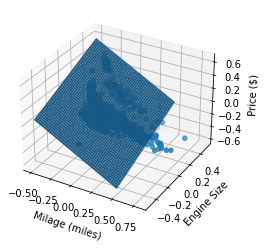

In [31]:
# hypothesis funciton
def hypothesis_function(input_data, thetas):
    # transpose theta so it is now vertical and ready for multiplcation
    # multiply to find the prediction value
    return np.matmul(thetas.T, input_data)

# cost function
def cost_function(inputs, outputs, thetas):
    sum_cost = 0
    m = inputs.shape[0]
    # sum of the difference squared / 2m
    for i in range(m):
        sum_cost += np.square(hypothesis_function(inputs[i], thetas) - outputs[i])
    return sum_cost / (2 * m)

# partial derivative of thetas
def partial_derivative(inputs, outputs, thetas, x_terms):
    sum_d = 0
    m = inputs.shape[0]
    # sum of the difference * the matching feature x_term / m
    for i in range(m):
        sum_d += (hypothesis_function(inputs[i], thetas) - outputs[i]) * x_terms[i]
    return sum_d / m

# gradient descent
def gradient_descent(inputs, outputs, thetas, alpha):
    new_thetas = np.zeros(thetas.shape[0])
    # for each theta calculate the partial derivative
    for j in range(thetas.shape[0]):
        # use inputs[:,j] to get the corresponding feature column
        step = alpha * partial_derivative(inputs, outputs, thetas, inputs[:,j])
        new_thetas[j] = thetas[j] - step
    return new_thetas

# normalization function
def mean_normalization(data):
    d_range = np.max(data) - np.min(data)
    d_mean = np.average(data)
    normalize = lambda x: (x - d_mean)/d_range
    return normalize(data)

# learning rate
a = 1.5
iterations = 100

# parameters
_thetas = np.zeros(input_data.shape[1])

# normalizing features
normalized_input_data = np.zeros((input_data.shape[0], input_data.shape[1]))
normalized_input_data[:,0] = np.ones(input_data.shape[0])
for i in range(1, input_data.shape[1]):
    normalized_input_data[:,i] = mean_normalization(input_data[:,i])
normalized_output_data = mean_normalization(output_data)

print('cost before:', cost_function(normalized_input_data, normalized_output_data, _thetas))

for i in range(iterations):
    _thetas = gradient_descent(normalized_input_data, normalized_output_data, _thetas, a)
    print("iteration: ", i, "cost: ", cost_function(normalized_input_data, normalized_output_data, _thetas))
    
print('cost after:', cost_function(normalized_input_data, normalized_output_data, _thetas))

fig = plt.figure()
ax = plt.axes(projection="3d")

# scatter current data
ax.scatter3D(normalized_input_data[:,1], normalized_input_data[:,2], normalized_output_data)

# get plane x and y spaces
x_lin = np.linspace(-0.5, 0.5, normalized_input_data.shape[0])
y_lin = np.linspace(-0.5, 0.5, normalized_input_data.shape[0])

# z function
def calculate_z(x, y):
    return hypothesis_function([1, x, y], _thetas)

# create grid and plot surface
X, Y = np.meshgrid(x_lin, y_lin)
zs = calculate_z(np.ravel(X), np.ravel(Y))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

ax.set_xlabel("Milage (miles)")
ax.set_ylabel("Engine Size")
ax.set_zlabel("Price ($)")